<a href="https://colab.research.google.com/github/Jack-ki1/MARTIAL_JENGA_PROJECT_AI_ENGINEERING/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: Problem Definition and Data Collection

Define the Goal: Clearly state the objective: to build a regression model that predicts the numerical value of a customer's purchase amount (in USD)
based on their demographic and behavioral data.

Collect Data: Download the "Customer Shopping Trends Dataset" from Kaggle and load it into your chosen environment (e.g., Python with Pandas).

Phase 2: Exploratory Data Analysis (EDA) and Data Preparation

Understand the Data: Examine the dataset's structure, identify data types (numerical, categorical), look for missing values, and analyze the distribution of key variables like "Age," "Annual Income," and the target variable "Purchase Amount (USD)".

Handle Missing Values: Decide how to manage any missing or null data points. This might involve removing rows with missing values or filling them in (imputation) based on statistical measures (e.g., mean, median) or other predictive methods.

Encode Categorical Variables: Machine learning models typically require numerical input. Convert categorical features like "Gender," "Item Purchased," "Category," "Payment Method," "Color," "Season," and "Location" into a numerical format using techniques like one-hot encoding or label encoding.

Feature Engineering (Optional but Recommended): Create new, more informative features from existing ones if possible (e.g., a "Total Purchases per Year" metric if raw dates are available).

Split the Data: Divide your dataset into two or three parts: a training set (for teaching the model), a validation set (for tuning the model), and a test set (for evaluating the final, trained model on unseen data).

Phase 3: Model Building and Training
Select a Model: Choose appropriate regression algorithms suitable for predicting continuous numerical values. Popular choices for this type of problem include:

Linear Regression (simple baseline model)

Random Forest Regressor (generally high performance)

XGBoost Regressor (often wins competitions)

Support Vector Regressor (SVR)

Train the Model: Use the training data to train the selected algorithm(s) to find patterns and relationships between the input features and the target variable "Purchase Amount (USD)".

Phase 4: Model Evaluation and Tuning

Evaluate Performance: Assess how well your model makes predictions using appropriate regression metrics. Key metrics include:

Root Mean Square Error (RMSE): Measures the average difference between the predicted and actual amounts; lower is better.

Mean Absolute Error (MAE): Another measure of average error, often easier to interpret in the original units (USD).

R-squared (R²): Indicates the proportion of the variance in the target variable that is predictable from the features.

Tune Hyperparameters: Adjust the internal settings (hyperparameters) of your chosen model(s) to optimize performance.

Techniques like cross-validation can ensure robustness and prevent overfitting.

Phase 5: Deployment and Further Steps

Make Predictions: Once you are satisfied with your model's performance, use it to make predictions on your held-out test set or new, unseen customer data.

Interpret and Deploy: Understand the insights gained from the model (e.g., which features most influence purchase amount). You can then integrate the model into a practical application or a business decision-making process.


## DEFIINE TASK:

### Building a regression model to predict the numerical value of a customer's purchase amount (in USD) based on their demographic and behavioral data.

In [1]:
#load librairies
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# STEP ONE: READING THE DATASET

import pandas as pd
import kagglehub
import os

# Define the dataset handle and the filename within the dataset
dataset_handle = "iamsouravbanerjee/customer-shopping-trends-dataset"
# Corrected file_name based on the os.listdir output
file_name = "shopping_trends_updated.csv"

# Download the entire dataset to a local directory
# This function returns the path to the downloaded dataset directory
downloaded_dataset_dir = kagglehub.dataset_download(dataset_handle)

# Construct the full path to the CSV file within the downloaded directory
full_file_path = os.path.join(str(downloaded_dataset_dir), file_name)

# Load the CSV into a pandas DataFrame
df = pd.read_csv(full_file_path)


display("A look IN THE SHAPE OF THE DATASET:",df.shape)
display("A SAMPLE LOOK INTO THE DATASET:",df.sample(20))
display("A DESCRIPTION OF THE DATASET:",df.describe())
display("INFORMATION ON THE DATASET:",df.info())

Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


'A look IN THE SHAPE OF THE DATASET:'

(3900, 18)

'A SAMPLE LOOK INTO THE DATASET:'

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2029,2030,25,Male,Scarf,Accessories,23,Montana,M,Pink,Spring,4.6,No,Next Day Air,No,No,40,PayPal,Quarterly
1393,1394,46,Male,Gloves,Accessories,58,Idaho,L,Yellow,Spring,3.9,No,Express,Yes,Yes,14,PayPal,Fortnightly
2441,2442,45,Male,Jewelry,Accessories,36,California,M,Black,Fall,4.7,No,Free Shipping,No,No,5,Credit Card,Monthly
1543,1544,56,Male,Jeans,Clothing,89,Wisconsin,M,Indigo,Fall,4.0,No,Standard,Yes,Yes,24,Venmo,Annually
2024,2025,62,Male,Socks,Clothing,23,Arkansas,L,Silver,Fall,3.7,No,Express,No,No,39,PayPal,Weekly
137,138,68,Male,Sneakers,Footwear,43,Colorado,M,Turquoise,Spring,4.7,Yes,Free Shipping,Yes,Yes,38,PayPal,Weekly
2910,2911,32,Female,Belt,Accessories,32,Mississippi,M,Blue,Summer,2.9,No,Store Pickup,No,No,41,Credit Card,Monthly
2658,2659,52,Female,Handbag,Accessories,47,Ohio,XL,Indigo,Summer,3.2,No,Next Day Air,No,No,39,PayPal,Monthly
2915,2916,26,Female,Shirt,Clothing,30,Oregon,M,Cyan,Fall,4.5,No,Express,No,No,39,Debit Card,Bi-Weekly
1398,1399,30,Male,Dress,Clothing,45,Texas,M,Cyan,Summer,2.5,No,Free Shipping,Yes,Yes,25,Credit Card,Weekly


'A DESCRIPTION OF THE DATASET:'

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

'INFORMATION ON THE DATASET:'

None

In [3]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
df.drop(['Item Purchased','Location', 'Size', 'Color', 'Season','Shipping Type', 'Discount Applied', 'Promo Code Used'], axis=1, inplace=True)
display("SHAPE OF THE DATASET:",df.shape)
display("INFORMATION ON THE DATASET:",df.info())

'SHAPE OF THE DATASET:'

(3900, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Review Rating           3900 non-null   float64
 6   Subscription Status     3900 non-null   object 
 7   Previous Purchases      3900 non-null   int64  
 8   Payment Method          3900 non-null   object 
 9   Frequency of Purchases  3900 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 304.8+ KB


'INFORMATION ON THE DATASET:'

None

In [6]:
#using one hot encoder to encode non-numeric columns
#from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

# --- 2. Define Columns by Encoding Type ---

# Columns for One-Hot Encoding (Nominal, Unordered)
one_hot_cols = ['Gender', 'Category', 'Subscription Status', 'Payment Method']

# Column for Ordinal Encoding (Ordered)
ordinal_col = ['Frequency of Purchases']

# Numerical columns (to be passed through without encoding)
numerical_cols = ['Customer ID','Age', 'Previous Purchases', 'Review Rating', 'Purchase Amount (USD)'] # Include target variable here to pass through initially

# --- 3. Define the Ordinal Categories in the Correct Order ---
# This step is crucial to maintain the ranking
frequency_order = [
    'Rarely',
    'Annually',
    'Every 3 Months',
    'Quarterly',
    'Bi-Weekly',
    'Fortnightly',
    'Monthly',
    'Weekly'
]

ordinal_categories = [frequency_order]

# --- 4. Create Preprocessing Pipelines ---

# One-hot encoder pipeline
one_hot_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ordinal encoder pipeline
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# --- 5. Combine Transformers using ColumnTransformer ---
# This applies the correct transformation to each column group simultaneously
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_transformer, one_hot_cols),
        ('ordinal', ordinal_transformer, ordinal_col),
        ('numeric', 'passthrough', numerical_cols) # Keep numerical columns as they are
    ],
    remainder='drop' # Drops any columns not specified
)

# --- 6. Apply the transformations and create the final encoded DataFrame ---

# Fit and transform the data
df_encoded_np = preprocessor.fit_transform(df)

# Get the new column names for the one-hot encoded features
one_hot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)

# Combine all new column names in the correct order
all_feature_names = list(one_hot_feature_names) + ordinal_col + numerical_cols

# Convert the resulting numpy array back into a pandas DataFrame
df_encoded = pd.DataFrame(df_encoded_np, columns=all_feature_names)

# --- 7. Display the result ---
print(df_encoded.head())
print("\nEncoded DataFrame shape:", df_encoded.shape)

   Gender_Female  Gender_Male  Category_Accessories  Category_Clothing  \
0            0.0          1.0                   0.0                1.0   
1            0.0          1.0                   0.0                1.0   
2            0.0          1.0                   0.0                1.0   
3            0.0          1.0                   0.0                0.0   
4            0.0          1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Subscription Status_No  \
0                0.0                 0.0                     0.0   
1                0.0                 0.0                     0.0   
2                0.0                 0.0                     0.0   
3                1.0                 0.0                     0.0   
4                0.0                 0.0                     0.0   

   Subscription Status_Yes  Payment Method_Bank Transfer  Payment Method_Cash  \
0                      1.0                           0.0         

In [7]:
# Assuming 'df_encoded' is your final DataFrame from the previous step

# Define the target variable (y)
y = df_encoded['Purchase Amount (USD)']

# Define the features (X) by dropping the target column from the DataFrame
X = df_encoded.drop('Purchase Amount (USD)', axis=1)

# Verify the shapes of your X and y
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# View the first few rows of X to confirm the structure
print("\nFirst 5 rows of X:")
print(X.head())

Shape of X (features): (3900, 19)
Shape of y (target): (3900,)

First 5 rows of X:
   Gender_Female  Gender_Male  Category_Accessories  Category_Clothing  \
0            0.0          1.0                   0.0                1.0   
1            0.0          1.0                   0.0                1.0   
2            0.0          1.0                   0.0                1.0   
3            0.0          1.0                   0.0                0.0   
4            0.0          1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Subscription Status_No  \
0                0.0                 0.0                     0.0   
1                0.0                 0.0                     0.0   
2                0.0                 0.0                     0.0   
3                1.0                 0.0                     0.0   
4                0.0                 0.0                     0.0   

   Subscription Status_Yes  Payment Method_Bank Transfer  Payme

In [8]:
# Split the data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

# Print the size of each new set
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"y_train size: {y_train.shape[0]}")
print(f"y_test size: {y_test.shape[0]}")



Training set size: 3120 samples
Testing set size: 780 samples
y_train size: 3120
y_test size: 780


In [11]:
# Preprocessing: Linear Regression is sensitive to scale → standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#use the linearregression model
model=LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
#MAKE PREDICTIONS
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [16]:
import numpy as np
#--- MODEL EVALUATION --
# Calculate key regression metrics on both train and test sets
 # This helps diagnose overfitting (large gap between train and test performance)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("=== LINEAR REGRESSION PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse:,.2f} | Test RMSE: ${test_rmse:,.2f}")
print(f"Train MAE:  ${train_mae:,.2f} | Test MAE:  ${test_mae:,.2f}")
print(f"Train R²:   {train_r2:.4f} | Test R²: {test_r2:.4f}")

=== LINEAR REGRESSION PERFORMANCE ===
Train RMSE: $23.62 | Test RMSE: $23.79
Train MAE:  $20.48 | Test MAE:  $20.77
Train R²:   0.0044 | Test R²: -0.0118


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), # Use the same RandomForestRegressor with random_state
                            param_grid=param_grid,
                            cv=3, # 3-fold cross-validation
                            n_jobs=-1, # Use all available cores
                            verbose=2, # Display progress
                            scoring='neg_mean_squared_error') # Metric to optimize (RMSE is sqrt of MSE, so we use neg_mse)

print("GridSearchCV setup complete.")

GridSearchCV setup complete.


In [23]:
print("Starting GridSearchCV. This may take some time...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_scaled, y_train)

print("GridSearchCV finished.")

# Print the best parameters found
print(f"Best parameters: {grid_search_rf.best_params_}")

# Print the best score (negative MSE, so we negate it for RMSE)
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search_rf.best_score_):,.2f}")

Starting GridSearchCV. This may take some time...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
GridSearchCV finished.
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation RMSE: 24.02


In [24]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_train_pred_tuned_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)

train_rmse_tuned_rf = np.sqrt(train_mse_tuned_rf)
test_rmse_tuned_rf = np.sqrt(test_mse_tuned_rf)

train_mae_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
test_mae_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)

train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

print("=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_tuned_rf:,.2f} | Test RMSE: ${test_rmse_tuned_rf:,.2f}")
print(f"Train MAE:  ${train_mae_tuned_rf:,.2f} | Test MAE:  ${test_mae_tuned_rf:,.2f}")
print(f"Train R²:   {train_r2_tuned_rf:.4f} | Test R²: {test_r2_tuned_rf:.4f}")

=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===
Train RMSE: $19.97 | Test RMSE: $23.93
Train MAE:  $17.22 | Test MAE:  $20.86
Train R²:   0.2885 | Test R²: -0.0235


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), # Use the same RandomForestRegressor with random_state
                            param_grid=param_grid,
                            cv=3, # 3-fold cross-validation
                            n_jobs=-1, # Use all available cores
                            verbose=2, # Display progress
                            scoring='neg_mean_squared_error') # Metric to optimize (RMSE is sqrt of MSE, so we use neg_mse)

print("GridSearchCV setup complete.")

GridSearchCV setup complete.


In [26]:
print("Starting GridSearchCV. This may take some time...")
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_scaled, y_train)

print("GridSearchCV finished.")

# Print the best parameters found
print(f"Best parameters: {grid_search_rf.best_params_}")

# Print the best score (negative MSE, so we negate it for RMSE)
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search_rf.best_score_):,.2f}")

Starting GridSearchCV. This may take some time...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_train_pred_tuned_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)

train_rmse_tuned_rf = np.sqrt(train_mse_tuned_rf)
test_rmse_tuned_rf = np.sqrt(test_mse_tuned_rf)

train_mae_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
test_mae_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)

train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

print("=== TUNED RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_tuned_rf:,.2f} | Test RMSE: ${test_rmse_tuned_rf:,.2f}")
print(f"Train MAE:  ${train_mae_tuned_rf:,.2f} | Test MAE:  ${test_mae_tuned_rf:,.2f}")
print(f"Train R²:   {train_r2_tuned_rf:.4f} | Test R²: {test_r2_tuned_rf:.4f}")

In [18]:
# Initialize the RandomForestRegressor model
# You can tune hyperparameters like n_estimators, max_depth, etc. for better performance
model_rf = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
model_rf.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully!")

RandomForestRegressor model trained successfully!


In [19]:
# Make predictions on the training and test sets
y_train_pred_rf = model_rf.predict(X_train_scaled)
y_test_pred_rf = model_rf.predict(X_test_scaled)

print("Predictions made for RandomForestRegressor.")

Predictions made for RandomForestRegressor.


In [20]:
import numpy as np

# Calculate key regression metrics for RandomForestRegressor
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("=== RANDOM FOREST REGRESSOR PERFORMANCE ===")
print(f"Train RMSE: ${train_rmse_rf:,.2f} | Test RMSE: ${test_rmse_rf:,.2f}")
print(f"Train MAE:  ${train_mae_rf:,.2f} | Test MAE:  ${test_mae_rf:,.2f}")
print(f"Train R²:   {train_r2_rf:.4f} | Test R²: {test_r2_rf:.4f}")

=== RANDOM FOREST REGRESSOR PERFORMANCE ===
Train RMSE: $9.12 | Test RMSE: $24.38
Train MAE:  $7.74 | Test MAE:  $21.02
Train R²:   0.8517 | Test R²: -0.0622


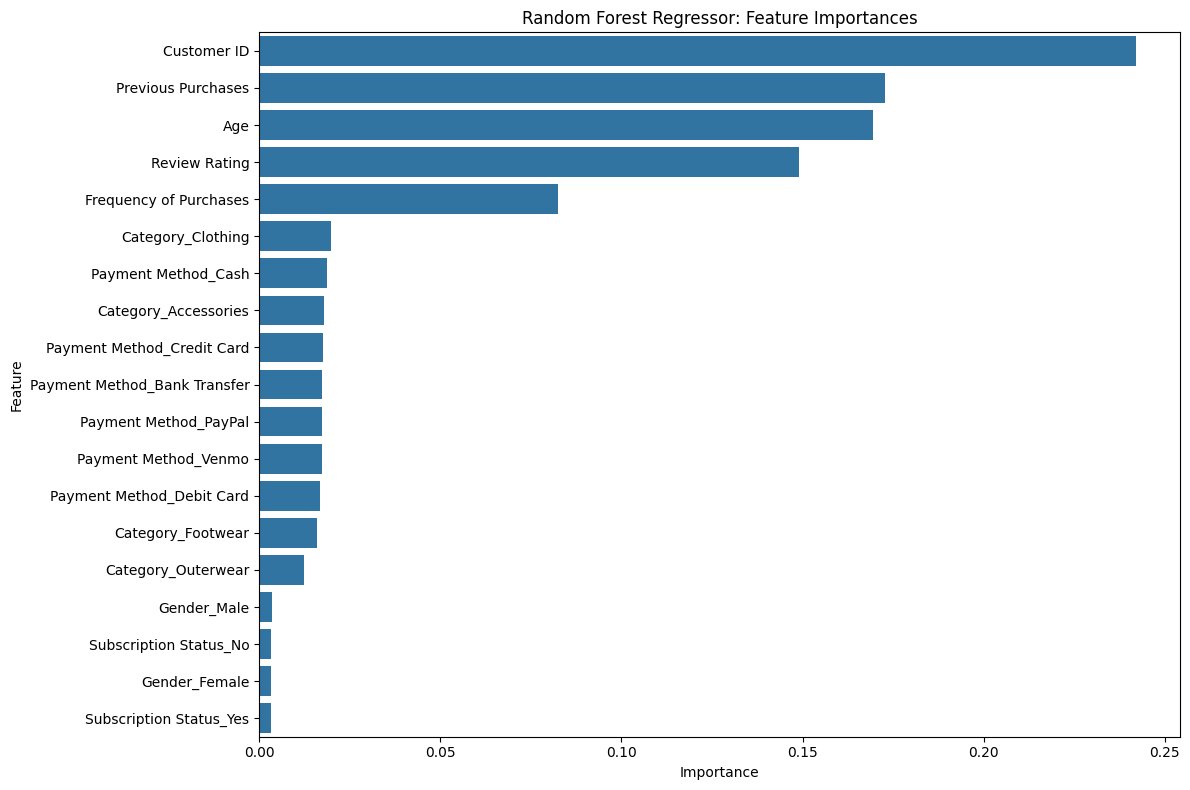

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances_rf = model_rf.feature_importances_

# Create a DataFrame for easy sorting and visualization
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Random Forest Regressor: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

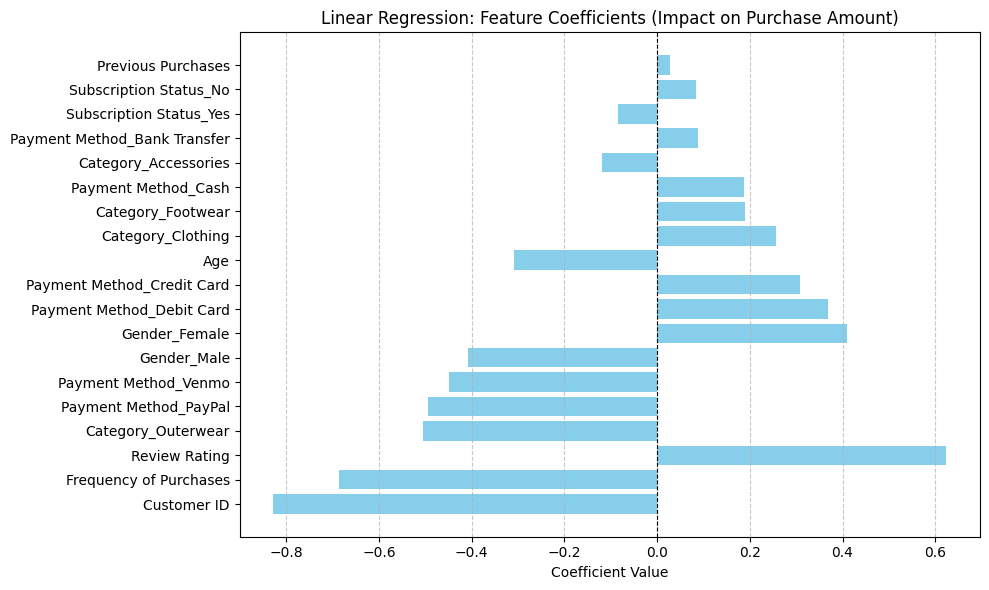

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 7. MODEL INTERPRETATION --
# Extract feature names and their corresponding coefficients (weights)
feature_names = X.columns
coefficients = model.coef_
# Create a DataFrame for easy sorting and visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute magnitude
# Plot the feature importances (coefficients)
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression: Feature Coefficients (Impact on Purchase Amount)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Vertical line at zero
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()